## **Business & Data Understaning**

In [ ]:
import pandas as pd
df=pd.read_csv("/content/airline-passengers.csv")
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


This dataset include history of 12 years from **1949-01** to **1960-12**

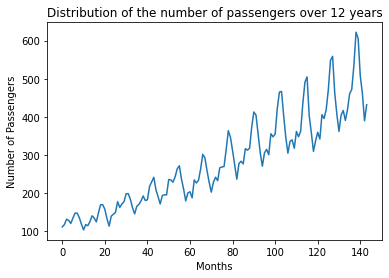

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Months')
plt.ylabel('Number of Passengers')
plt.title('Distribution of the number of passengers over 12 years')
plt.plot(df['Passengers'])
plt.show()

## **Data Preparation**

In [ ]:
def load_data(data, seq_len):
  X = []
  y = []
  for i in range(seq_len, len(data)):
    X.append(data.iloc[i-seq_len : i, 1])
    y.append(data.iloc[i,1])
  return X,y

In [ ]:
X,y=load_data(df,20)

In [ ]:
len(y)

124

In [ ]:
X_train=X[:100]
y_train=y[:100]
X_test=X[100:]
y_test=y[100:]

In [ ]:
import numpy as np
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
X_train

array([[112, 118, 132, ..., 149, 170, 170],
       [118, 132, 129, ..., 170, 170, 158],
       [132, 129, 121, ..., 170, 158, 133],
       ...,
       [301, 356, 348, ..., 491, 505, 404],
       [356, 348, 355, ..., 505, 404, 359],
       [348, 355, 422, ..., 404, 359, 310]])

In [ ]:
print('x_train.shape = ',X_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ', X_test.shape)
print('y_test.shape = ', y_test.shape)

x_train.shape =  (100, 20)
y_train.shape =  (100,)
x_test.shape =  (24, 20)
y_test.shape =  (24,)


In [ ]:
X_train = np.reshape(X_train, (100, 20, 1))
X_test = np.reshape(X_test, (24, 20, 1))

In [ ]:
print('x_train.shape = ',X_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ', X_test.shape)
print('y_test.shape = ', y_test.shape)

x_train.shape =  (100, 20)
y_train.shape =  (100,)
x_test.shape =  (24, 20)
y_test.shape =  (24,)


## **Neural Network from Keras**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(40, input_shape=(20,),activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=500, batch_size=2, verbose=2)

Epoch 1/500
50/50 - 1s - loss: 8931.7559 - 909ms/epoch - 18ms/step
Epoch 2/500
50/50 - 0s - loss: 900.2935 - 73ms/epoch - 1ms/step
Epoch 3/500
50/50 - 0s - loss: 687.5327 - 68ms/epoch - 1ms/step
Epoch 4/500
50/50 - 0s - loss: 631.0620 - 73ms/epoch - 1ms/step
Epoch 5/500
50/50 - 0s - loss: 528.4342 - 78ms/epoch - 2ms/step
Epoch 6/500
50/50 - 0s - loss: 477.3054 - 72ms/epoch - 1ms/step
Epoch 7/500
50/50 - 0s - loss: 433.2821 - 72ms/epoch - 1ms/step
Epoch 8/500
50/50 - 0s - loss: 444.4915 - 78ms/epoch - 2ms/step
Epoch 9/500
50/50 - 0s - loss: 506.9724 - 74ms/epoch - 1ms/step
Epoch 10/500
50/50 - 0s - loss: 420.0892 - 73ms/epoch - 1ms/step
Epoch 11/500
50/50 - 0s - loss: 385.1682 - 75ms/epoch - 1ms/step
Epoch 12/500
50/50 - 0s - loss: 399.7555 - 72ms/epoch - 1ms/step
Epoch 13/500
50/50 - 0s - loss: 455.8631 - 70ms/epoch - 1ms/step
Epoch 14/500
50/50 - 0s - loss: 400.5811 - 72ms/epoch - 1ms/step
Epoch 15/500
50/50 - 0s - loss: 479.7157 - 80ms/epoch - 2ms/step
Epoch 16/500
50/50 - 0s - loss:

In [ ]:
y_pred=model.predict(X_test)

1/1 [==============================] - 0s 110ms/step


In [ ]:
y_pred

array([[366.18704],
       [340.26556],
       [387.4145 ],
       [393.15213],
       [398.0851 ],
       [495.09372],
       [561.09955],
       [569.3875 ],
       [471.73706],
       [417.60916],
       [363.9283 ],
       [396.04892],
       [425.71637],
       [406.21677],
       [472.73233],
       [438.94467],
       [463.68857],
       [551.2729 ],
       [629.5028 ],
       [639.50415],
       [529.6161 ],
       [464.24826],
       [416.4437 ],
       [443.54868]], dtype=float32)

In [ ]:
y_test

array([360, 342, 406, 396, 420, 472, 548, 559, 463, 407, 362, 405, 417,
       391, 419, 461, 472, 535, 622, 606, 508, 461, 390, 432])

Text(0, 0.5, 'Passengers')

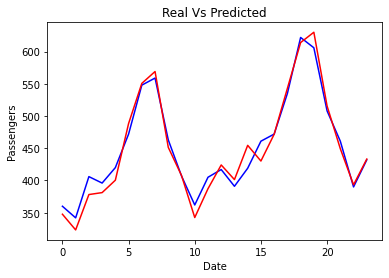

In [ ]:
plt.plot(y_test, color='blue',label='Real')
plt.plot(y_pred, color='red',label='Predicted')
plt.title('Real Vs Predicted')
plt.xlabel('Date')
plt.ylabel('Passengers')

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred)).round(2)
mae = np.round(np.mean(np.abs(y_test-y_pred))*100,2)
mape = np.round(np.mean(np.abs(y_test-y_pred)/y_test)*100,2)

In [ ]:
print("RMSE=",rmse)
print("MAE=",mae)
print("MAPE=",mape)

RMSE= 18.78
MAE= 8644.66
MAPE= 19.21
